##**Pythonで視覚化[Preparation編]**
読込んだデータセットに対し、以下のデータクリーニングが実行できます。
1．記号識別され欠損データをN.A.(NaN)に置換、2．不要なデータ項目の削除、3．欠損データを含む行を削除、4．カテゴリーデータ項目を Labelエンコード、5．データ項目名を英訳

また、クリーニング後のデータで決定木を描画することができます。


※参考として、データは数値… データ型は Object とい時の強制数値化 処理も付加しています。
***

###**手順**
- 「1．インストール」の「▷」をクリックしてください。（インストールが実行されます）。
- 「2．データセット読込み」Select_Datasetのドロップダウンメニュー(dataset:)よりデータセット
を選択してください。（任意のcsvデータを読込む場合は Upload を選択してください）
- dataset_type についても、Classification（分類データ）か Regression（回帰データ）のいずれかを選択してください。
- Load dataset の「▷」をクリックしてください。（データセットが読み込まれます）。
- 「3．データクリーニング」は、上のセルから順に、必要な処理のみを選択しながら、所定項目を入力の上、実行（「▷」をクリック）してください。
- 「4．決定木」を実行してください。（木の深さは、[ max_depth: ] で任意に変更できます）

***
## **csvデータ読み込み時の注意点**
- **csvデータの表形式は以下としてください。**

|説明変数1|説明変数2|説明変数3|…|説明変数n|…|目的変数|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|data |data|data |…|data |…|data |
|data |data|data |…|data |…|data |
|･ |･|･ |…|･ |…|･ |
|･ |･|･ |…|･ |…|･ |
|･ |･|･ |…|･ |…|･ |

- [**注意**] csvデータは文字コードを「UTF-8」としてください。



## **1．インストール**

In [1]:
!pip install dtreeviz --quiet

     |████████████████████████████████| 72 kB 285 kB/s 


In [2]:
!pip install googletrans==4.0.0-rc1 --quiet

     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 42 kB 567 kB/s 
     |████████████████████████████████| 1.4 MB 12.1 MB/s 
     |████████████████████████████████| 65 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 1.1 MB/s 


## **2．データセット読込み**

In [6]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = 'Titanic(seaborn) :binary' #@param ['Boston_housing :regression', 'Diabetes :regression', 'Breast_cancer :binary','Titanic :binary', 'Titanic(seaborn) :binary', 'Iris :classification', 'Loan_prediction :binary','wine :classification', 'Occupancy_detection :binary', 'Upload']

In [7]:
#@title Load dataset

#ライブラリインポート
import numpy as np
import pandas as pd   #データを効率的に扱うライブラリ
import seaborn as sns #視覚化ライブラリ
import warnings       #警告を表示させないライブラリ
warnings.simplefilter('ignore')

'''
dataset（ドロップダウンメニュー）で選択したデータセットを読込み、データフレーム（df）に格納。
目的変数は、データフレームの最終列とし、FEATURES、TARGET、X、yを指定した後、データフレーム
に関する情報と先頭5列を表示。
任意のcsvデータを読込む場合は、datasetで'Upload'を選択。

'''

#任意のcsvデータ読込み及びデータフレーム格納、
if dataset =='Upload':
  from google.colab import files
  uploaded = files.upload()#Upload
  target = list(uploaded.keys())[0]
  df = pd.read_csv(target)

#Diabetes データセットの読込み及びデータフレーム格納、
elif dataset == "Diabetes :regression":
  from sklearn.datasets import load_diabetes
  diabetes = load_diabetes()
  df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
  df['target'] = diabetes.target

#Breast_cancer データセットの読込み及びデータフレーム格納、
elif dataset == "Breast_cancer :binary":
  from sklearn.datasets import load_breast_cancer
  breast_cancer = load_breast_cancer()
  df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
  #df['target'] = breast_cancer.target  #目的変数をカテゴリー数値とする時
  df['target'] = breast_cancer.target_names[breast_cancer.target]

#Titanic データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic :binary":
  data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
  df = pd.read_csv(data_url)
  #目的変数 Survived をデータフレーム最終列に移動
  X = df.drop(['Survived'], axis=1)
  y = df['Survived'] 
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#Titanic(seaborn) データセットの読込み及びデータフレーム格納、
elif dataset == "Titanic(seaborn) :binary":
  df = sns.load_dataset('titanic')
  #重複データをカットし、目的変数 alive をデータフレーム最終列に移動
  X = df.drop(['survived','pclass','embarked','who','adult_male','alive'], axis=1)
  y = df['alive']                   #目的変数データ
  df = pd.concat([X, y], axis=1)    #X,yを結合し、dfに格納

#iris データセットの読込み及びデータフレーム格納、
elif dataset == "Iris :classification":
  from sklearn.datasets import load_iris
  iris = load_iris()
  df = pd.DataFrame(iris.data, columns = iris.feature_names)
  #df['target'] = iris.target  #目的変数をカテゴリー数値とする時
  df['target'] = iris.target_names[iris.target]

#wine データセットの読込み及びデータフレーム格納、
elif dataset == "wine :classification":
  from sklearn.datasets import load_wine
  wine = load_wine()
  df = pd.DataFrame(wine.data, columns = wine.feature_names)
  #df['target'] = wine.target  #目的変数をカテゴリー数値とする時
  df['target'] = wine.target_names[wine.target]

#Loan_prediction データセットの読込み及びデータフレーム格納、 
elif dataset == "Loan_prediction :binary":
  data_url = "https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/raw/master/train.csv"
  df = pd.read_csv(data_url)

#Occupancy_detection データセットの読込み及びデータフレーム格納、 
elif dataset =='Occupancy_detection :binary':
  data_url = 'https://raw.githubusercontent.com/hima2b4/Auto_Profiling/main/Occupancy-detection-datatest.csv'
  df = pd.read_csv(data_url)
  df['date'] = pd.to_datetime(df['date'])    #[date]のデータ型をdatetime型に変更

#Boston データセットの読込み及びデータフレーム格納 
else:
  from sklearn.datasets import load_boston
  boston = load_boston()
  df = pd.DataFrame(boston.data, columns = boston.feature_names)
  df['target'] = boston.target

#データフレーム表示
df.info(verbose=True)         #データフレーム情報表示（verbose=Trueで表示数制限カット）
df.head()                     #データフレーム先頭5行表示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   age          714 non-null    float64 
 2   sibsp        891 non-null    int64   
 3   parch        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   deck         203 non-null    category
 7   embark_town  889 non-null    object  
 8   alone        891 non-null    bool    
 9   alive        891 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(2), object(3)
memory usage: 51.9+ KB


,sex,age,sibsp,parch,fare,class,deck,embark_town,alone,alive
0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False,no
1,female,38.0,1,0,71.2833,First,C,Cherbourg,False,yes
2,female,26.0,0,0,7.9250,Third,NaN,Southampton,True,yes
3,female,35.0,1,0,53.1000,First,C,Southampton,False,yes
4,male,35.0,0,0,8.0500,Third,NaN,Southampton,True,no


## **3．データクリーニング**

In [8]:
#@title 記号識別された欠損データをN.A.(NaN)に置換（☑ ＝実行）
#@markdown  ※missing_value_to_nan を☑すると、missing_value_symbol_is で指定した欠損記号をNaNに置換します
missing_value_to_nan = True #@param {type:"boolean"}
missing_value_symbol_is = '---' #@param {type:"raw"}

#指定記号をNaNに変換
if missing_value_to_nan == True:
  df = df.replace(missing_value_symbol_is, np.nan)
df.head()

,sex,age,sibsp,parch,fare,class,deck,embark_town,alone,alive
0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False,no
1,female,38.0,1,0,71.2833,First,C,Cherbourg,False,yes
2,female,26.0,0,0,7.9250,Third,NaN,Southampton,True,yes
3,female,35.0,1,0,53.1000,First,C,Southampton,False,yes
4,male,35.0,0,0,8.0500,Third,NaN,Southampton,True,no


In [9]:
#@title 不要なデータ項目の削除（項目名を指定し削除｜7割以上が欠損値の項目を削除☑）
#@markdown  **<font color= "Crimson">注意</font>：Drop_label_is（カラムを指定して削除）の記載は <u> ' ID ' , ' Age '  </u> などとしてください。**</font>
Drop_label_is =  'sibsp', 'parch'#@param {type:"raw"}

try:
  if Drop_label_is is not "":
    Drop_label_is = pd.Series(Drop_label_is)
    print('-----------------------------------------------------------------------------------------')
    print("Drop of specified column:", Drop_label_is.values)
    df.drop(columns=list(Drop_label_is),axis=1,inplace=True)
  else:
    print('※削除カラムの指定なし→処理スキップ')
except:
    print("※正常に処理されませんでした。入力に誤りがないか確認してください。")

#データの7割以上が欠損値のカラムを削除（☑ ＝実行）
Over_70percent_missing_value_is_drop = True #@param {type:"boolean"}

#各列ごとに、7割欠損がある列を削除
if Over_70percent_missing_value_is_drop == True:
  for col in df.columns:
    nans = df[col].isnull().sum()  # nanになっている行数をカウント

    # nan行数を全行数で割り、7割欠損している列をDrop
    if nans / len(df) > 0.7: 
        # 7割欠損列を削除
        print('-----------------------------------------------------------------------------------------')
        print("Drop of missing 70% column:", col)
        df.drop(col, axis=1, inplace=True)    

print('-----------------------------------------------------------------------------------------')

df.head()

-----------------------------------------------------------------------------------------
Drop of specified column: ['sibsp' 'parch']
-----------------------------------------------------------------------------------------
Drop of missing 70% column: deck
-----------------------------------------------------------------------------------------


,sex,age,fare,class,embark_town,alone,alive
0,male,22.0,7.2500,Third,Southampton,False,no
1,female,38.0,71.2833,First,Cherbourg,False,yes
2,female,26.0,7.9250,Third,Southampton,True,yes
3,female,35.0,53.1000,First,Southampton,False,yes
4,male,35.0,8.0500,Third,Southampton,True,no


In [10]:
#@title 欠損データを含む行を削除（☑ ＝実行）
Null_Drop  = True #@param {type:"boolean"}

if Null_Drop == True:
  df = df.dropna(how='any')
df.head()

,sex,age,fare,class,embark_town,alone,alive
0,male,22.0,7.2500,Third,Southampton,False,no
1,female,38.0,71.2833,First,Cherbourg,False,yes
2,female,26.0,7.9250,Third,Southampton,True,yes
3,female,35.0,53.1000,First,Southampton,False,yes
4,male,35.0,8.0500,Third,Southampton,True,no


**✓カテゴリーデータ項目を Labelエンコード** について

カテゴリーデータを分析に利用する場合、カテゴリーは数値に変換する必要があります。

[NG,OK] を {NG: 0, OK: 1} のようにエンコードする処理です。

例えば、カテゴリーデータ項目名が result である場合、**Object_label_to_encode_is** に 'result' と入力し、実行してください。（複数カラムを選択できます）

実行後、エンコードの結果とデータセットの先頭5行が表示されます。

In [11]:
#@title カテゴリーデータ項目を Labelエンコード（**対象：Dtype が int64, float64 以外のデータ項目**）
#@markdown  **<font color= "Crimson">注意</font>：指定は <u> ' ID ' , ' Age ' , </u> などとしてください。**
Object_label_to_encode_is = 'sex', 'embark_town', 'alive', 'alone', 'class' #@param {type:"raw"}
Object_label_to_encode_is = pd.Series(Object_label_to_encode_is)

from sklearn.preprocessing import LabelEncoder

encoders = dict()

try:
  for i in Object_label_to_encode_is:
    if Object_label_to_encode_is is not "":
      series = df[i]
      le = LabelEncoder()
      df[i] = pd.Series(
        le.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
        )
      encoders[i] = le
      print('-----------------------------------------------------------------------------------------')
      print('[エンコードカラム]：',i)
      le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
      print(le_name_mapping)
    else:
      print('skip')

except:
    print("※正常に処理されなかった場合は入力に誤りがないか確認してください。")
print('-----------------------------------------------------------------------------------------') 
df.head()
#https://stackoverflow.com/questions/54444260/labelencoder-that-keeps-missing-values-as-nan

-----------------------------------------------------------------------------------------
[エンコードカラム]： sex
{'female': 0, 'male': 1}
-----------------------------------------------------------------------------------------
[エンコードカラム]： embark_town
{'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2}
-----------------------------------------------------------------------------------------
[エンコードカラム]： alive
{'no': 0, 'yes': 1}
-----------------------------------------------------------------------------------------
[エンコードカラム]： alone
{False: 0, True: 1}
-----------------------------------------------------------------------------------------
[エンコードカラム]： class
{'First': 0, 'Second': 1, 'Third': 2}
-----------------------------------------------------------------------------------------


,sex,age,fare,class,embark_town,alone,alive
0,1,22.0,7.2500,2,2,0,0
1,0,38.0,71.2833,0,0,0,1
2,0,26.0,7.9250,2,2,1,1
3,0,35.0,53.1000,0,2,0,1
4,1,35.0,8.0500,2,2,1,0


**✓カラム名を英訳** について

この処理は、文字通りカラム名を英訳する処理です。

データ分析のライブラリに依存しますが、英字以外では文字化けする場合があり、これに対応させることを意図しています。

**Column_English_translation** の☑を外せば、この処理はスルーされます。


In [18]:
#@title データ項目名を英訳（☑ ＝実行）
Column_English_translation = True #@param {type:"boolean"}

from googletrans import Translator

if Column_English_translation == True:

  eng_columns = {}
  columns = df.columns
  translator = Translator()
  
  for column in columns:
    eng_column = translator.translate(column).text
    eng_column = eng_column.replace(' ', '_')
    eng_columns[column] = eng_column
    df.rename(columns=eng_columns, inplace=True)

print('-----------------------------------------------------------------------------------------')
print('[カラム名_翻訳結果（翻訳しない場合も表示）]')
print('-----------------------------------------------------------------------------------------') 
df.head(0)

-----------------------------------------------------------------------------------------
[カラム名_翻訳結果（翻訳しない場合も表示）]
-----------------------------------------------------------------------------------------


,gender,age,Boarding_fee,Boarding_class,Exit,Is_it_alone?,life_and_death


In [13]:
#@title データクリーニングの最終確認

numerical_col = []
Object_col = []

for col_name, item in df.iteritems():
    if item.dtype == object:
        Object_col.append(col_name)
    else:
        numerical_col.append(col_name)
        
print('-----------------------------------------------------------------------------------------')
print('Numerical_colomn:', numerical_col)
print('-----------------------------------------------------------------------------------------')
print('Object_colomn:', Object_col)
print('-----------------------------------------------------------------------------------------')

if df.isnull().values.sum()==0:
  print('[NA処理判定]')
  print('◎：欠損値はありません')
else:
  print('-----------------------------------------------------------------------------------------')
  print('[NA処理判定]')
  print('×：欠損値が',df.isnull().values.sum(),'つあります')

print('※各カラムのデータ型が[float64]か[int64]なら正しく処理されています')
print('-----------------------------------------------------------------------------------------')

#データフレーム表示
df.info(verbose=True)         #データフレーム情報表示（verbose=Trueで表示数制限カット）
df.head()                     #データフレーム先頭5行表示

-----------------------------------------------------------------------------------------
Numerical_colomn: ['sex', 'age', 'fare', 'class', 'embark_town', 'alone', 'alive']
-----------------------------------------------------------------------------------------
Object_colomn: []
-----------------------------------------------------------------------------------------
[NA処理判定]
◎：欠損値はありません
※各カラムのデータ型が[float64]か[int64]なら正しく処理されています
-----------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          712 non-null    int64  
 1   age          712 non-null    float64
 2   fare         712 non-null    float64
 3   class        712 non-null    int64  
 4   embark_town  712 non-null    int64  
 5   alone        712 non-null    int64  
 6   alive        712 non-null    in

,sex,age,fare,class,embark_town,alone,alive
0,1,22.0,7.2500,2,2,0,0
1,0,38.0,71.2833,0,0,0,1
2,0,26.0,7.9250,2,2,1,1
3,0,35.0,53.1000,0,2,0,1
4,1,35.0,8.0500,2,2,1,0


In [14]:
#@title データクリーニング結果 csv出力（☑ ＝実行）

csv_output = False #@param {type:"boolean"}

#csv出力
if csv_output == True:
  df.to_csv('after_prep_data.csv',encoding='utf_8_sig',index=False)
  from google.colab import files
  files.download('after_prep_data.csv')

## **4．決定木実行**
<details><summary>決定木について</summary><div>
決定木はシンプルなほど解釈しやすくなりますので、まずは可読性を重視した決定木を出力するようにしています。（木の深さは2～6に任意設定できます）
*   #orientation='LR' の # を消すと、決定木の表示は横向きになります。
*   予測したいXの値を X=[X1,X2,X3,X4,…] とすると予測値が表示されます。

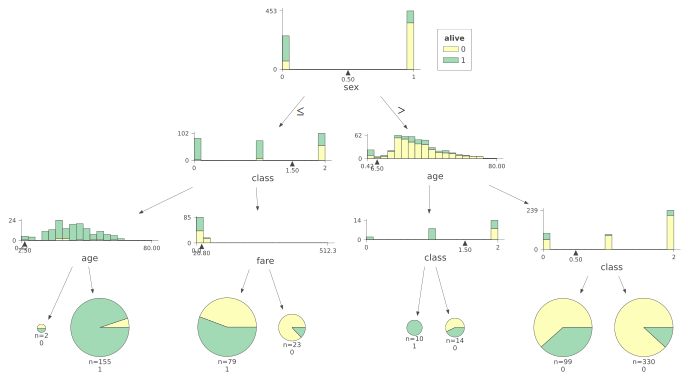

In [15]:
#@title **決定木**（木の深さ設定｜max_depth：2～6｜☑ ＝実行） { run: "auto" }
#Display_decision_tree = True #@param {type:"boolean"}

dataset_type = 'Classification' #@param ["Classification", "Regression"]
max_depth = 3 #@param {type:"slider", min:2, max:6, step:1}


#FEATURES、TARGET、X、yを指定 
FEATURES = df.columns[:-1]    #説明変数のデータ項目を指定
TARGET = df.columns[-1]       #目的変数のデータ項目を指定
X = df.loc[:, FEATURES]       #FEATURESのすべてのデータをXに格納
y = df.loc[:, TARGET]         #TARGETのすべてのデータをyに格納

#dtreeviz import
from dtreeviz.trees import *

if dataset_type == 'Classification':
  CLASS_NAME = list(y.unique())
  dtree = tree.DecisionTreeClassifier(max_depth=max_depth)
  dtree.fit(X,y)
  viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               class_names = CLASS_NAME,
               fontname='DejaVu Sans',
               #X = [3,3,3,5,3]
              )

if dataset_type == 'Regression':
  dtree = tree.DecisionTreeRegressor(max_depth=max_depth)
  dtree.fit(X,y)
  viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               fontname='DejaVu Sans',
               #orientation='LR',
               #X = [3,3,5,3]
              )
viz

In [19]:
#@title **決定木 画像出力（☑ ＝実行）**  { run: "auto" }

Decision_tree_output = True #@param {type:"boolean"}

if Decision_tree_output == True:
  viz.save('Decission_tree_result.svg')
  from google.colab import files
  files.download('Decission_tree_result.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **参考**

In [ ]:
#@title データは数値… データ型は Object とい時の強制数値化

#@markdown **※同じデータ項目にintとfloatが混在している場合、[object]と認識されます。**

#@markdown **※これは、強制的にfloatに変換する処理です。**

print('■変換結果','\n')
for col in Object_col:
  try:
    df[col] = df[col].astype('float64')
    print('✓',col,'→ change')
  except:
    print('✓',col,'→ skip')
